In [1]:
import numpy as np
from scipy.integrate import odeint
import sympy as sp
import matplotlib.pyplot as plt

# 定义符号变量
x, y = sp.symbols('x,y')
ε,Ri,Va,Cei,A,Rp,Vε,E,Cep,s,Cs = sp.symbols('ε Ri Va Cei A Rp Vε E Cep s Cs')
# V, C, B, F, P1, P0 = sp.symbols('V C B F P1 P0')

# # # 定义参数值（可以根据需要调整）
params = {ε:0.1,Ri:4,Va:5,Cei:6,A:1.5,Rp:4,Vε:5,E:3,Cep:4,s:0.2,Cs:4}

# 收益矩阵
profit_mat=[[ε*Ri + Va - Cei,A*Rp + Vε + E - Cep],
            [(1 - s)*Ri + Va - Cei, A*Rp - Cs],
            [ε*Ri,Rp + Vε + E - Cep],
            [Ri,Rp]]

# profit_mat=[
#     [V - C - B,P1 + B ],
#     [F - C,P0 - F],
#     [V ,P1],
#     [0,P0]
# ]

### 1. 复制动态方程构建
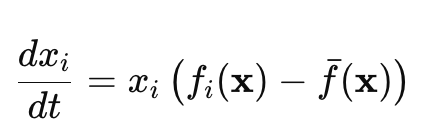

In [2]:

# 1. 复制动态方程构建
# 企业1参与策略的平均收益
avg_U_firm_participate = y * profit_mat[0][0] + (1 - y) * profit_mat[1][0]
avg_U_firm_not_participate = y * profit_mat[2][0]  + (1 - y) * profit_mat[3][0]
phi_x = x * (avg_U_firm_participate- (x * avg_U_firm_participate + (1 - x) * avg_U_firm_not_participate))

# 企业2监督策略的平均收益
avg_U_gov_supervise = x * profit_mat[0][1] + (1 - x) * profit_mat[2][1]
avg_U_gov_no_supervise = x * profit_mat[1][1]  + (1 - x) * profit_mat[3][1]
phi_y = y * (avg_U_gov_supervise - (y * avg_U_gov_supervise + (1 - y) * avg_U_gov_no_supervise))

print("企业1的复制动态方程：",sp.factor(phi_x))
print("企业2的复制动态方程：",sp.factor(phi_y))



企业1的复制动态方程： -x*(x - 1)*(-Cei + Ri*s*y - Ri*s + Va)
企业2的复制动态方程： -y*(y - 1)*(-Cep + Cs*x + E + Vε)


### 2. 求解均衡点

稳定性分析：通过分析复制动态方程的固定点（即策略频率不再变化的点），可以确定ESS。在该博弈场景下，我们需要解出$$dx/dt=0$$ 和 $$dy/dt=0$$ 的解，从而找到平衡点。



In [3]:
# 2. 求解均衡点
equilibrium_points = sp.solve([phi_x,phi_y], [x,y])  
# equilibrium_y = sp.solve(phi_y, [x,y])
# print("企业1的复制动态方程：",sp.factor(equilibrium_x))
# print("企业1的复制动态方程：",sp.factor(equilibrium_y))

# 筛选出 [x, y] 均衡点对
# equilibrium_points = [(x_val, y_val)  for x_val in equilibrium_x for y_val in equilibrium_y]

print('均衡点:')
for point in equilibrium_points:
    print(f'x: {point[0]}, y: {point[1]}')

# TODO:这里可能加一个过滤条件会更好一点，因为有些均衡点是不合理的

均衡点:
x: 0, y: 0
x: 0, y: 1
x: 1, y: 0
x: 1, y: 1
x: (Cep - E - Vε)/Cs, y: (Cei + Ri*s - Va)/(Ri*s)


### 3. 稳定性分析 - 计算雅可比矩阵并求特征值
我们希望均衡点是稳定的，即在系统面临微小扰动时，

In [4]:

# 3. 稳定性分析 - 计算雅可比矩阵并求特征值
# 定义复制动态方程的向量
phi = sp.Matrix([phi_x, phi_y])
variables = sp.Matrix([x, y])

# 计算雅可比矩阵
J = phi.jacobian(variables)
print(J)

# 检查每个均衡点的稳定性
for point in equilibrium_points:
    J_at_point = J.subs([(x, point[0]), (y, point[1])])
    eigenvalues = J_at_point.eigenvals()

    print(f'\n均衡点 x: {point[0]}, y: {point[1]} 的雅可比矩阵特征值:')
    for eig in eigenvalues:
        print(f'特征值: {eig}, 实部: {sp.re(eig)}')

        # if sp.re(eig) > 0:
        #     print('此均衡点是不稳定的')

        # else:
        #     print('此均衡点是稳定的')
        


Matrix([[-x*(y*(-Cei + Ri*ε + Va) + (1 - y)*(-Cei + Ri*(1 - s) + Va)) + x*(Ri*y*ε + Ri*(1 - y) - y*(-Cei + Ri*ε + Va) - (1 - y)*(-Cei + Ri*(1 - s) + Va)) + y*(-Cei + Ri*ε + Va) - (1 - x)*(Ri*y*ε + Ri*(1 - y)) + (1 - y)*(-Cei + Ri*(1 - s) + Va), x*(Ri*ε - Ri*(1 - s) - x*(Ri*ε - Ri*(1 - s)) - (1 - x)*(Ri*ε - Ri))], [y*(A*Rp - Rp - y*(A*Rp - Rp) - (1 - y)*(A*Rp - Cs - Rp)), x*(A*Rp - Cep + E + Vε) - y*(x*(A*Rp - Cep + E + Vε) + (1 - x)*(-Cep + E + Rp + Vε)) + y*(Rp*(1 - x) + x*(A*Rp - Cs) - x*(A*Rp - Cep + E + Vε) - (1 - x)*(-Cep + E + Rp + Vε)) + (1 - x)*(-Cep + E + Rp + Vε) - (1 - y)*(Rp*(1 - x) + x*(A*Rp - Cs))]])

均衡点 x: 0, y: 0 的雅可比矩阵特征值:
特征值: -Cei - Ri*s + Va, 实部: -re(Cei) + re(Va) - re(Ri*s)
特征值: -Cep + E + Vε, 实部: -re(Cep) + re(E) + re(Vε)

均衡点 x: 0, y: 1 的雅可比矩阵特征值:
特征值: -Cei + Va, 实部: -re(Cei) + re(Va)
特征值: Cep - E - Vε, 实部: re(Cep) - re(E) - re(Vε)

均衡点 x: 1, y: 0 的雅可比矩阵特征值:
特征值: Cei + Ri*s - Va, 实部: re(Cei) - re(Va) + re(Ri*s)
特征值: -Cep + Cs + E + Vε, 实部: -re(Cep) + re(Cs) + re

In [5]:
eig

sqrt((Cei - Va)*(Cei + Ri*s - Va)*(Cep - E - Vε)*(Cep - Cs - E - Vε)/(Cs*Ri*s))

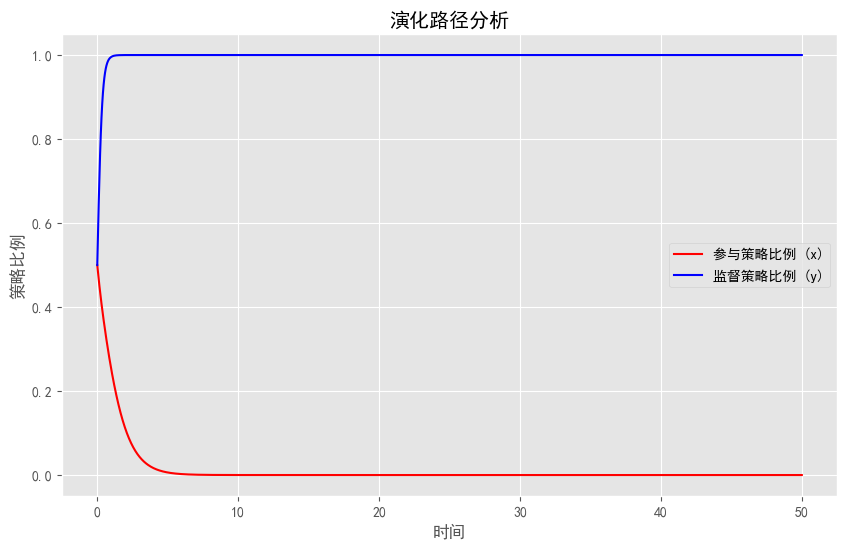

In [6]:

# 4. 演化路径分析
# 转换复制动态方程为数值函数
# phi_x_func = sp.lambdify((x, V, C, B, F, P1, P0), phi_x.subs(params), 'numpy')
# phi_y_func = sp.lambdify((y, V, C, B, F, P1, P0), phi_y.subs(params), 'numpy')

phi_x_func = sp.lambdify((x,y,ε,Ri,Va,Cei,A,Rp,Vε,E,Cep,s,Cs), phi_x.subs(params), 'numpy')
phi_y_func = sp.lambdify((x,y,ε,Ri,Va,Cei,A,Rp,Vε,E,Cep,s,Cs), phi_y.subs(params), 'numpy')

# 定义微分方程组
def replicator_dynamics(X, t, params):
    x, y = X
    dxdt = phi_x_func(x,y, *params.values())
    dydt = phi_y_func(x,y, *params.values())
    return [dxdt, dydt]

# 设置初始条件和时间范围
initial_conditions = [0.50, 0.50]  # 初始参与策略比例
time_span = np.linspace(0, 50, 1000)  # 时间范围

# 求解微分方程
solution = odeint(replicator_dynamics, initial_conditions, time_span, args=(params,))

# 绘制演化路径
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))
plt.plot(time_span, solution[:, 0], label='参与策略比例 (x)', color='r')
plt.plot(time_span, solution[:, 1], label='监督策略比例 (y)', color='b')
plt.xlabel('时间')
plt.ylabel('策略比例')
plt.title('演化路径分析')
plt.legend()
plt.grid(True)
plt.show()


## 雅可比与稳定性

### 1. 特征值的定义和意义

在数学中，特征值是线性代数中一个重要的概念。假设我们有一个 $ n \times n $ 的矩阵 $\mathbf{A}$，特征值 $\lambda$ 满足以下方程：

$$
\mathbf{A} \mathbf{v} = \lambda \mathbf{v},
$$

其中，$\mathbf{v}$ 是一个特征向量，$\lambda$ 是特征值。

几何上，这意味着矩阵 $\mathbf{A}$ 作用在特征向量 $\mathbf{v}$ 上的结果是改变其长度（由 $\lambda$ 决定），而不改变其方向。特征值描述了沿着特征向量方向的扩展或收缩效应。

### 2. 动力系统中雅可比矩阵的特征值

在动力系统分析中，特征值的概念可以推广到描述系统稳定性的雅可比矩阵 $\mathbf{J}$。雅可比矩阵是非线性系统在固定点附近的线性化描述，它捕捉了系统在固定点附近的小扰动会如何演化。

对于一个线性化的系统：

$$
\frac{d \mathbf{z}}{dt} = \mathbf{J} \mathbf{z},
$$

如果 $\mathbf{J}$ 是系统在固定点附近的雅可比矩阵，则特征值 $\lambda$ 反映了在特定方向上的状态变量的变化速率。具体而言：

- **特征值的实部**决定了扰动在该方向上的增长或衰减。
- **特征值的虚部**（如果存在）决定了扰动是否呈现周期性或振荡行为。

### 3. 特征值和稳定性：理论依据

假设我们在固定点 $\mathbf{z}^*$ 处线性化了系统，系统的局部动态行为可以用线性微分方程表示为：

$$
\frac{d \delta \mathbf{z}}{dt} = \mathbf{J} \delta \mathbf{z},
$$

其中 $\delta \mathbf{z}$ 表示偏离固定点的小扰动。

通过求解该方程，解的形式为：

$$
\delta \mathbf{z}(t) = \sum_{i=1}^n c_i e^{\lambda_i t} \mathbf{v}_i,
$$

其中，$\lambda_i$ 是雅可比矩阵 $\mathbf{J}$ 的第 $i$ 个特征值，$\mathbf{v}_i$ 是对应的特征向量，$c_i$ 是与初始条件相关的常数。

#### 重要结论

1. 如果特征值的实部 $\operatorname{Re}(\lambda_i) < 0$，则 $e^{\lambda_i t} \to 0$ 随时间趋于零，意味着在该方向上扰动会**衰减**。当所有特征值的实部均为负时，系统的所有方向上的扰动都会衰减，固定点为**稳定点**（吸引子）。

2. 如果特征值的实部 $\operatorname{Re}(\lambda_i) > 0$，则 $e^{\lambda_i t} \to \infty$ 随时间增加，意味着在该方向上扰动会**放大**。只要有一个特征值的实部为正，系统在该方向上会偏离固定点，导致固定点**不稳定**。

3. 如果某个特征值的实部为零，系统的稳定性无法直接判断。此时可能需要进一步的非线性分析（如中心流形理论）来确定系统的长时间行为。

### 4. 为什么实部决定了稳定性？

特征值的实部直接影响了指数项 $e^{\operatorname{Re}(\lambda) t}$ 的增长或衰减行为：

- 当实部为负时，$e^{\operatorname{Re}(\lambda) t}$ 是一个递减的指数函数，对应于扰动的衰减。
- 当实部为正时，$e^{\operatorname{Re}(\lambda) t}$ 是一个递增的指数函数，对应于扰动的放大。
- 当实部为零时，$e^{\operatorname{Re}(\lambda) t} = 1$，扰动既不放大也不衰减。

因此，**特征值的实部**决定了扰动的变化趋势，从而决定了固定点的稳定性。

### 5. 示例推导

考虑一个二维动力系统，其线性化方程的雅可比矩阵为：

$$
\mathbf{J} = \begin{bmatrix} -1 & 0 \\ 0 & 2 \end{bmatrix}.
$$

求解特征值，可以得到 $\lambda_1 = -1$ 和 $\lambda_2 = 2$。

- **特征值 $\lambda_1 = -1$**：对应的实部为负，说明在该方向上扰动会衰减。
- **特征值 $\lambda_2 = 2$**：对应的实部为正，说明在该方向上扰动会放大。

由于存在正实部的特征值，说明固定点是**不稳定的**。

### 6. 进一步的解释：特征值和相空间的几何形态

特征值不仅影响稳定性，还决定了相空间中的几何形态：

- **实部为负的特征值**：扰动沿该方向收缩，表现为**吸引子**。
- **实部为正的特征值**：扰动沿该方向扩散，表现为**排斥点**。
- **虚部非零的复特征值**：引入振荡成分，系统可能出现**螺旋状**的相轨迹，表现为螺旋收缩（稳定焦点）或螺旋发散（不稳定焦点）。

---

### 总结

通过雅可比矩阵的特征值，我们可以得到系统在固定点附近的线性近似行为，特征值的实部决定了扰动是收缩还是扩散，因此可以用来判断固定点的稳定性：

- **所有特征值的实部为负**：固定点为**稳定点**。
- **至少一个特征值的实部为正**：固定点为**不稳定点**。
- **特征值实部为零**：稳定性不确定，需要进一步分析。

这种方法为我们提供了一种简洁、有效的工具，来判断非线性动力系统在固定点附近的稳定性。

好的，让我们逐一解答您的问题：

### 1) 特征值的具体应用案例与应用原理

特征值作为线性代数中的基本概念，在科学与工程中有广泛的应用。以下是一些常见的应用案例和背后的原理：

#### 案例 1：振动分析（结构工程、机械系统）
- **应用原理**：在结构工程或机械系统中，比如建筑物、桥梁或机械臂，这些系统受到外部力量后会产生振动。我们通常构建系统的运动方程，并将其转化为一个矩阵形式。这个矩阵的特征值描述了系统的**固有频率**（自然频率），即系统的振动模式。
- **解释**：若特征值为实数且为正，系统可能发生线性增长或衰减。如果特征值是复数，虚部决定了振动的频率，实部则决定振幅是增长还是衰减。

#### 案例 2：图像处理中的主成分分析（PCA）
- **应用原理**：主成分分析用于数据降维，通过求解数据协方差矩阵的特征值和特征向量，我们可以找到数据主要变化方向，将数据投影到这些方向上，实现降维。
- **解释**：PCA 中的数据协方差矩阵的特征值表示不同主成分的方差大小。最大特征值对应的特征向量表示数据中最大变化方向，可以用来找到数据的最优低维表示。

#### 案例 3：马尔可夫链的稳态分析（概率和统计）
- **应用原理**：马尔可夫链描述了系统状态随时间转移的过程，转移矩阵的特征值分析可以帮助找到**稳态分布**。马尔可夫链的转移矩阵的最大特征值通常为1，且对应的特征向量代表稳态分布。
- **解释**：通过寻找特征值为1的特征向量，可以找到系统在长时间后的稳定状态分布。

#### 案例 4：控制理论中的稳定性分析
- **应用原理**：在自动控制系统中，特征值可以用于判断系统的稳定性，特别是通过状态空间模型（即雅可比矩阵）的特征值分析，控制工程师可以判断系统是否会随着时间趋于平衡。
- **解释**：系统的雅可比矩阵的特征值的实部为负表示系统在该方向上是稳定的。特征值虚部为零表示没有振荡行为，非零虚部则表示振荡。

### 2) 雅可比矩阵特征值的虚部决定振荡行为的原因

特征值的虚部可以导致系统出现**周期性或振荡行为**的原因在于其对解的影响。对于线性化的系统，设特征值为 $\lambda = a + bi$，则系统解形式为：

$$
\delta \mathbf{z}(t) = e^{(a + bi)t} \mathbf{v},
$$

其中，$e^{bi t}$ 部分可以拆解成 $\cos(bt) + i \sin(bt)$，从而得到：

$$
\delta \mathbf{z}(t) = e^{at} (\cos(bt) \mathbf{v} + i \sin(bt) \mathbf{v}),
$$

这说明解在实部 $a$ 控制的指数变化的基础上，乘上了一个周期性变化项 $\cos(bt)$ 和 $\sin(bt)$。因此：

- **虚部 $b$** 对应周期性或振荡行为的频率。当 $b \neq 0$ 时，解会呈现周期性的变化，即表现为振荡。
- **实部 $a$** 控制振幅是否放大或缩小。若 $a < 0$，则系统的振幅随时间衰减（阻尼振荡）；若 $a > 0$，则振幅随时间增大（发散振荡）。

### 3) $\frac{d \mathbf{z}}{dt}$ 的求解过程

对于线性化方程：

$$
\frac{d \delta \mathbf{z}}{dt} = \mathbf{J} \delta \mathbf{z},
$$

它是一个线性常微分方程系统。其解的过程如下：

#### 步骤 1：假设解的形式
我们假设解的形式为：

$$
\delta \mathbf{z}(t) = e^{\lambda t} \mathbf{v},
$$

其中 $\lambda$ 是一个常数，$\mathbf{v}$ 是一个向量。

#### 步骤 2：代入方程，化简求特征值
将假设的解代入微分方程：

$$
\frac{d}{dt}(e^{\lambda t} \mathbf{v}) = \mathbf{J} (e^{\lambda t} \mathbf{v}).
$$

得到

$$
\lambda e^{\lambda t} \mathbf{v} = e^{\lambda t} \mathbf{J} \mathbf{v}.
$$

因为 $e^{\lambda t} \neq 0$，可以消去，得到

$$
\mathbf{J} \mathbf{v} = \lambda \mathbf{v}.
$$

这就是雅可比矩阵 $\mathbf{J}$ 的特征值问题：$\lambda$ 是特征值，$\mathbf{v}$ 是对应的特征向量。

#### 步骤 3：通解的构造
得到特征值 $\lambda_i$ 和特征向量 $\mathbf{v}_i$ 后，通解为各个特征解的线性组合：

$$
\delta \mathbf{z}(t) = c_1 e^{\lambda_1 t} \mathbf{v}_1 + c_2 e^{\lambda_2 t} \mathbf{v}_2 + \dots + c_n e^{\lambda_n t} \mathbf{v}_n,
$$

其中 $c_1, c_2, \dots, c_n$ 是由初始条件决定的常数。

### 小结

- **特征值的应用**：特征值在工程、数据分析和控制理论中有广泛应用，例如在振动分析、PCA、马尔可夫链稳态分析和系统稳定性分析中。
- **虚部引起振荡的原因**：特征值虚部 $b$ 通过 $\cos(bt)$ 和 $\sin(bt)$ 的周期性影响，使得系统解产生振荡行为。
- **求解过程**：通过假设解的形式为指数函数 $e^{\lambda t}\mathbf{v}$，特征值 $\lambda$ 作为系统动态的关键量控制了解的收敛、发散和振荡特性。

利用雅可比矩阵判断固定点的稳定性是非线性动力系统分析中的一个核心方法。该方法基于线性化思想，旨在通过线性近似来分析系统在固定点附近的行为。以下是完整的理论、推导和对应公式。

### 1. 问题背景：非线性动力系统和固定点

一个非线性动力系统通常可以表示为：

\[
\frac{d\mathbf{z}}{dt} = \mathbf{F}(\mathbf{z}),
\]

其中，\(\mathbf{z} = (z_1, z_2, \dots, z_n)^T\) 是状态变量向量，\(\mathbf{F}(\mathbf{z})\) 是一个非线性函数向量。

**固定点（Equilibrium Point）**是指满足 \(\mathbf{F}(\mathbf{z}) = 0\) 的点，也就是说，在固定点处，系统状态不再变化。

### 2. 稳定性分析的目标

我们关心的是，当系统处于固定点附近时，是否会回到该点（稳定）或远离该点（不稳定）。要判断一个固定点的稳定性，可以利用**线性化方法**，即使用系统在固定点处的**雅可比矩阵**来近似描述系统的局部动态。

### 3. 雅可比矩阵的定义

对于一个非线性系统 \(\mathbf{F}(\mathbf{z})\)，在某个固定点 \(\mathbf{z}^*\) 处，我们可以构建系统的**雅可比矩阵（Jacobian Matrix）** \(\mathbf{J}\)，它表示 \(\mathbf{F}(\mathbf{z})\) 对状态变量的偏导数矩阵：

\[
\mathbf{J}(\mathbf{z}^*) = \begin{bmatrix} \frac{\partial F_1}{\partial z_1} & \frac{\partial F_1}{\partial z_2} & \dots & \frac{\partial F_1}{\partial z_n} \\ \frac{\partial F_2}{\partial z_1} & \frac{\partial F_2}{\partial z_2} & \dots & \frac{\partial F_2}{\partial z_n} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial F_n}{\partial z_1} & \frac{\partial F_n}{\partial z_2} & \dots & \frac{\partial F_n}{\partial z_n} \end{bmatrix}.
\]

雅可比矩阵描述了系统在固定点附近的线性近似，捕捉了每个状态变量变化对系统其他变量的影响。

### 4. 线性化近似：固定点附近的动态行为

在固定点 \(\mathbf{z}^*\) 附近，可以将 \(\mathbf{z}\) 表示为 \(\mathbf{z} = \mathbf{z}^* + \delta \mathbf{z}\)，其中 \(\delta \mathbf{z}\) 是一个小的偏移量。将 \(\mathbf{z}\) 代入系统方程，得到：

\[
\frac{d(\mathbf{z}^* + \delta \mathbf{z})}{dt} = \mathbf{F}(\mathbf{z}^* + \delta \mathbf{z}).
\]

由于 \(\mathbf{z}^*\) 是固定点，有 \(\mathbf{F}(\mathbf{z}^*) = 0\)，因此上式变为：

\[
\frac{d \delta \mathbf{z}}{dt} = \mathbf{F}(\mathbf{z}^* + \delta \mathbf{z}).
\]

利用泰勒展开，我们可以将 \(\mathbf{F}(\mathbf{z}^* + \delta \mathbf{z})\) 近似为：

\[
\mathbf{F}(\mathbf{z}^* + \delta \mathbf{z}) \approx \mathbf{J}(\mathbf{z}^*) \cdot \delta \mathbf{z}.
\]

因此，系统在固定点附近的动态行为可以通过以下线性化方程来描述：

\[
\frac{d \delta \mathbf{z}}{dt} = \mathbf{J}(\mathbf{z}^*) \cdot \delta \mathbf{z}.
\]

### 5. 雅可比矩阵的特征值与稳定性判断

为了判断固定点的稳定性，我们需要求出雅可比矩阵 \(\mathbf{J}(\mathbf{z}^*)\) 的**特征值**。设特征值为 \(\lambda_1, \lambda_2, \dots, \lambda_n\)，那么：

- 如果所有特征值的**实部**都为负，则固定点是一个**稳定点（吸引子）**。此时，任何微小偏离都会衰减，系统状态会回到固定点。
- 如果至少有一个特征值的**实部**为正，则固定点是**不稳定的**。此时，存在微小偏离会被放大，系统状态会远离固定点。
- 如果存在特征值的**实部为零**，则该点的稳定性无法通过线性分析确定。需要进一步采用非线性分析工具（如中心流形理论）来判断。

### 6. 具体推导过程：演化博弈中的应用

在演化博弈中，通常有一组复制动态方程描述策略比例的变化，例如：

\[
\frac{dx}{dt} = x \cdot (f(x) - \bar{f}),
\]

其中，\(x\) 是策略的比例，\(f(x)\) 是策略的收益，\(\bar{f}\) 是群体平均收益。

#### 具体步骤：

1. **找到固定点**：解方程 \(\frac{dx}{dt} = 0\) 来找到固定点 \(x^*\)。
2. **构建雅可比矩阵**：在固定点 \(x^*\) 处计算系统的雅可比矩阵 \(\mathbf{J}\)。
3. **求解特征值**：计算雅可比矩阵的特征值。
4. **判断稳定性**：根据特征值的实部判断固定点的稳定性。

---

### 7. 示例：二维系统的固定点稳定性分析

假设一个简单的二维动力系统：

\[
\frac{dx}{dt} = x(1 - x - y), \quad \frac{dy}{dt} = y(1 - y - x).
\]

#### 步骤1：找到固定点

通过解方程 \(\frac{dx}{dt} = 0\) 和 \(\frac{dy}{dt} = 0\)，可以找到固定点，例如 \((x^*, y^*) = (0, 0), (1, 0), (0, 1), \text{和} \left(\frac{1}{2}, \frac{1}{2}\right)\)。

#### 步骤2：计算雅可比矩阵

在点 \((x, y)\) 处，系统的雅可比矩阵为：

\[
\mathbf{J} = \begin{bmatrix} \frac{\partial}{\partial x}(x(1 - x - y)) & \frac{\partial}{\partial y}(x(1 - x - y)) \\ \frac{\partial}{\partial x}(y(1 - y - x)) & \frac{\partial}{\partial y}(y(1 - y - x)) \end{bmatrix}.
\]

经过计算，得到：

\[
\mathbf{J} = \begin{bmatrix} 1 - 2x - y & -x \\ -y & 1 - 2y - x \end{bmatrix}.
\]

#### 步骤3：在固定点处计算特征值

在固定点 \(\left(\frac{1}{2}, \frac{1}{2}\right)\) 处，代入雅可比矩阵并求出特征值。例如，如果特征值实部均为负，则该点是稳定的。

---

### 总结

利用雅可比矩阵判断固定点的稳定性主要依赖以下步骤：

1. **构建雅可比矩阵**：描述系统在固定点附近的线性化动态。
2. **计算特征值**：分析雅可比矩阵的特征值，特征值的实部决定了固定点的稳定性。
3. **判断稳定性**：根据特征值的实部是否为负判断固定点的稳定性。

这个方法在演化博弈和动力系统分析中都十分常用，因为它提供了一种有效的手段来判断固定点的局部稳定性。